In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(225,225,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(4, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./128,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./128)

In [13]:
training_set=train_datagen.flow_from_directory('Dataset/train',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 1125 images belonging to 4 classes.


In [14]:
test_set=test_datagen.flow_from_directory('Dataset/test',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 335 images belonging to 4 classes.


In [15]:
from IPython.display import display

In [16]:
img_dims = 150
epochs = 100
batch_size = 32

In [17]:
history = Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/100
35/35 [==============================] - 24s 673ms/step - loss: 0.9224 - accuracy: 0.6249 - val_loss: 0.7315 - val_accuracy: 0.6938
Epoch 2/100
35/35 [==============================] - 19s 554ms/step - loss: 0.5596 - accuracy: 0.7821 - val_loss: 0.4306 - val_accuracy: 0.8594
Epoch 3/100
35/35 [==============================] - 22s 636ms/step - loss: 0.4705 - accuracy: 0.8399 - val_loss: 0.6348 - val_accuracy: 0.7281
Epoch 4/100
35/35 [==============================] - 21s 590ms/step - loss: 0.4408 - accuracy: 0.8307 - val_loss: 0.4024 - val_accuracy: 0.8438
Epoch 5/100
35/35 [==============================] - 20s 571ms/step - loss: 0.3710 - accuracy: 0.8673 - val_loss: 0.2700 - val_accuracy: 0.9000
Epoch 6/100
35/35 [==============================] - 19s 531ms/step - loss: 0.3169 - accuracy: 0.8838 - val_loss: 0.3158 - val_accuracy: 0.8906
Epoch 7/100
35/35 [==============================] - 19s 537ms/step - loss: 0.3089 - accuracy: 0.8856 - val_loss: 0.1501 - val_accuracy:

35/35 [==============================] - 20s 576ms/step - loss: 0.0922 - accuracy: 0.9744 - val_loss: 0.0193 - val_accuracy: 0.9906
Epoch 58/100
35/35 [==============================] - 20s 570ms/step - loss: 0.0429 - accuracy: 0.9854 - val_loss: 0.0193 - val_accuracy: 0.9937
Epoch 59/100
35/35 [==============================] - 19s 543ms/step - loss: 0.0786 - accuracy: 0.9762 - val_loss: 0.0100 - val_accuracy: 0.9937
Epoch 60/100
35/35 [==============================] - 19s 557ms/step - loss: 0.0166 - accuracy: 0.9927 - val_loss: 1.0426 - val_accuracy: 0.8438
Epoch 61/100
35/35 [==============================] - 19s 533ms/step - loss: 0.0923 - accuracy: 0.9780 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 62/100
35/35 [==============================] - 19s 548ms/step - loss: 0.0700 - accuracy: 0.9830 - val_loss: 7.7445e-04 - val_accuracy: 1.0000
Epoch 63/100
35/35 [==============================] - 19s 545ms/step - loss: 0.0945 - accuracy: 0.9744 - val_loss: 0.0049 - val_accuracy: 1

In [18]:
import matplotlib.pyplot as plt

In [19]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

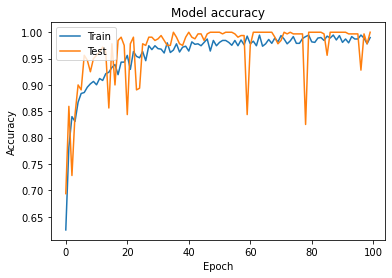

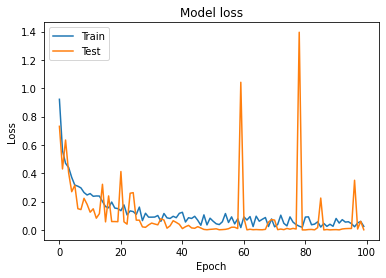

In [20]:
graph()

In [21]:
import h5py

In [22]:
Classifier.save('weather5.h5')
       

In [23]:
from keras.models import load_model

In [24]:
model=load_model('weather5.h5')

In [25]:
import numpy as np

In [31]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('cloudy19.jpg',target_size=(225,225))

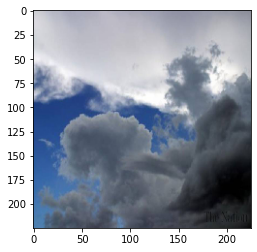

In [32]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [33]:
test_image=image.img_to_array(test_image)

In [34]:
test_image=np.expand_dims(test_image,axis=0)

In [35]:
result=model.predict(test_image)

In [36]:
prediction = result[0]

In [37]:
classes=training_set.class_indices

In [38]:
classes

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [39]:
prediction=list(prediction)

In [40]:
prediction

[0.0, 0.0, 1.0, 0.0]

In [41]:
classes=['cloudy', 'rain', 'shine', 'sunrise']

In [42]:
output=zip(classes,prediction)

In [43]:
output=dict(output)

In [44]:
output

{'cloudy': 0.0, 'rain': 0.0, 'shine': 1.0, 'sunrise': 0.0}

In [45]:
if output['cloudy']==1.0:
    print("cloudy")
elif output['rain']==1.0:
    print("rain")
elif output['shine']==1.0:
    print("shine")
elif output['sunrise']==1.0:
    print("sunrise")

shine
